# Project: Home Credit Default Risk
Jian Xu, Tao Peng, Yuanlong Gu, Hua Jin

#### Note:
This notebook file was created by Jupyter Notebook. <br>
For some reason, anaconda is not working in my computer. <br>
So for this moment, I can only use pandas in this notebook, instead of a normal python program .py file. <br>
I can move the code from this notebook to a normal .py file once I fix the anaconda problem. <br>
However, the benefit of this notebook file is that it is convenient to visualize data. Many of the kernel posts also use notebooks. <br>
This file uses Python 2 syntax (I have problem using Python 3 with pandas).

## Import libraries

In [36]:
%%capture
import numpy as np 
import pandas as pd 
import os
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()


## Read data

In [4]:
app_train = pd.read_csv('../all/application_train.csv')
#app_test = pd.read_csv('../all/application_test.csv')

In [5]:
app_train.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


** According to some posters in kernel, the columns EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 are most important. **

In [46]:
app_train_ext = app_train[['SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]

In [47]:
app_train_ext.head(3)

,SK_ID_CURR,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,100002,0.083037,0.262949,0.139376
1,100003,0.311267,0.622246,NaN
2,100004,NaN,0.555912,0.729567


In [82]:
ext_source_cols = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

## Visualize data

In [83]:
def plot_histograms(df, cols):
    for col in cols:
        df.hist(column = col, bins = 100)    

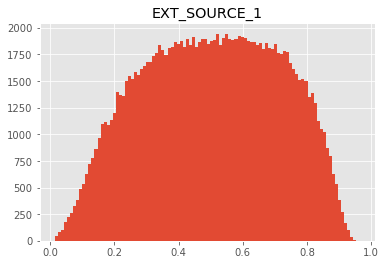

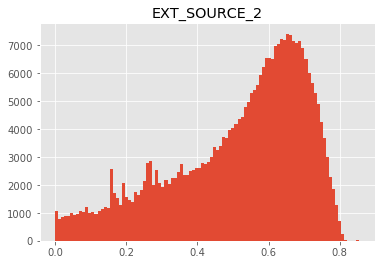

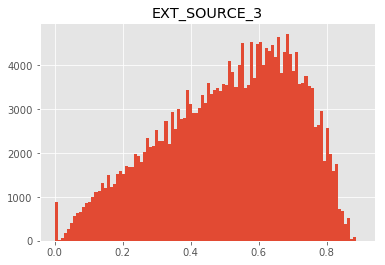

In [84]:
plot_histograms(app_train_ext, ext_source_cols)

## Process missing data
** At this moment, let us start with simply replacing missing data by 0.**

In [85]:
def missing_values(df, cols):
    for col in cols:
        num_missing_values = df[col].isnull().sum()
        num_rows = len(df)
        percentage_missing_values = 100 * num_missing_values / float(num_rows)
        print('Percentage of missing values in column {0} = {1} / {2} = {3}%'.format(col, num_missing_values, num_rows, percentage_missing_values))

** Percentage of missing values among all the rows: **

In [86]:
missing_values(app_train_ext, ext_source_cols)

Percentage of missing values in column EXT_SOURCE_1 = 173378 / 307511 = 56.381072547%
Percentage of missing values in column EXT_SOURCE_2 = 660 / 307511 = 0.214626468647%
Percentage of missing values in column EXT_SOURCE_3 = 60965 / 307511 = 19.8253070622%


** After filling missing values by 0: **

In [87]:
app_train_ext_fillna = app_train_ext.fillna(0.0)
missing_values(app_train_ext_fillna, ext_source_cols)

Percentage of missing values in column EXT_SOURCE_1 = 0 / 307511 = 0.0%
Percentage of missing values in column EXT_SOURCE_2 = 0 / 307511 = 0.0%
Percentage of missing values in column EXT_SOURCE_3 = 0 / 307511 = 0.0%


** Filling missing values with 0 introduces too many 0 values: **

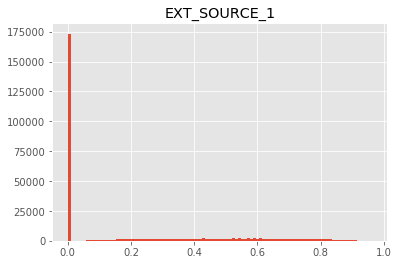

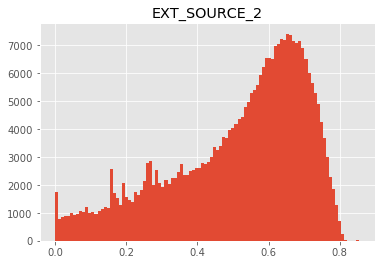

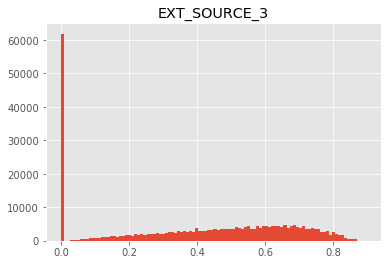

In [88]:
plot_histograms(app_train_ext_fillna, ext_source_cols)

## Todo: deal with outliers

Should find a way to deal with the outliers shown in the above plots

## Standardize

In [103]:
def show_statistics(df, cols):
    for col in cols:
        df_col = df[col]
        mean = df_col.mean()
        std = df_col.std()
        print('For column {0}, mean = {1}, std = {2}'.format(col, mean, std))

** Before standardization: **

In [104]:
show_statistics(app_train_ext_fillna, ext_source_cols)

For column EXT_SOURCE_1, mean = 0.219023635649, std = 0.285373624074
For column EXT_SOURCE_2, mean = 0.513288651299, std = 0.19233387531
For column EXT_SOURCE_3, mean = 0.409574748894, std = 0.268176934773


In [109]:
def standardize(df, cols):
    res = {} #Empty dictionary
    
    for col in cols:
        df_col = df[col]
        mean = df_col.mean()
        std = df_col.std()
        df_col_norm = (df_col - mean) / std
        res[col] = df_col_norm
    
    res_df = pd.DataFrame(data = res) # Converts dictionary to DataFrame
    
    return res_df

In [111]:
app_train_ext_fillna_stand = standardize(app_train_ext_fillna, ext_source_cols)

** After standardization: **

In [112]:
show_statistics(app_train_ext_fillna_stand, ext_source_cols)

For column EXT_SOURCE_1, mean = -9.88410462453e-16, std = 1.0
For column EXT_SOURCE_2, mean = 1.9844878689e-16, std = 1.0
For column EXT_SOURCE_3, mean = -1.39839948391e-13, std = 1.0


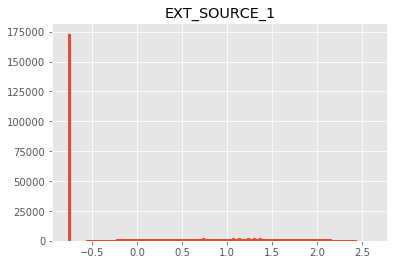

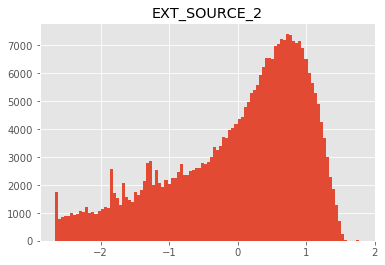

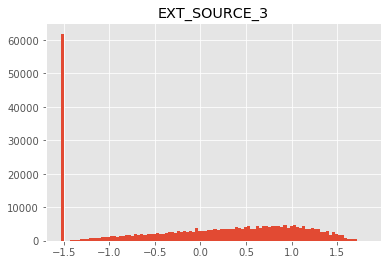

In [113]:
plot_histograms(app_train_ext_fillna_stand, ext_source_cols)

## Normalize

In [114]:
def normalize(df, cols):
    res = {} #Empty dictionary
    
    for col in cols:
        df_col = df[col]
        max = df_col.max()
        df_col_norm = df_col / max
        res[col] = df_col_norm
    
    res_df = pd.DataFrame(data = res) # Converts dictionary to DataFrame
    
    return res_df

In [115]:
app_train_ext_fillna_norm = normalize(app_train_ext_fillna, ext_source_cols)

** After normalization: **

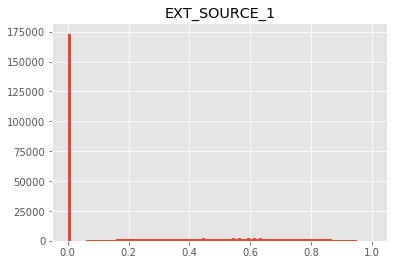

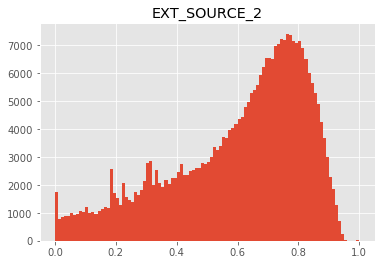

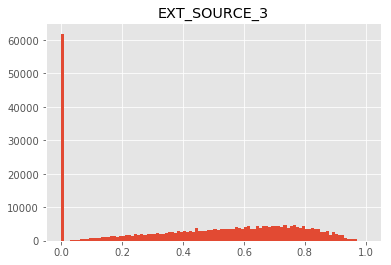

In [117]:
plot_histograms(app_train_ext_fillna_norm, ext_source_cols)